In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
#The dataset is taken from Kaggle. The specific URL is https://www.kaggle.com/raghupalem/bill_authentication
dataset = pd.read_csv("bill_authentication.csv")  
dataset.head()

In [20]:
dataset.shape

(1372, 5)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = dataset.drop('Class', axis=1)  
y = dataset['Class']  

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtree = DecisionTreeClassifier()

In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
predictions = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.97      0.98       231
          1       0.96      1.00      0.98       181

avg / total       0.98      0.98      0.98       412



In [33]:
print(confusion_matrix(y_test,predictions))

[[223   8]
 [  0 181]]


In [36]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(dataset.columns[1:])
features

['Skewness', 'Curtosis', 'Entropy', 'Class']

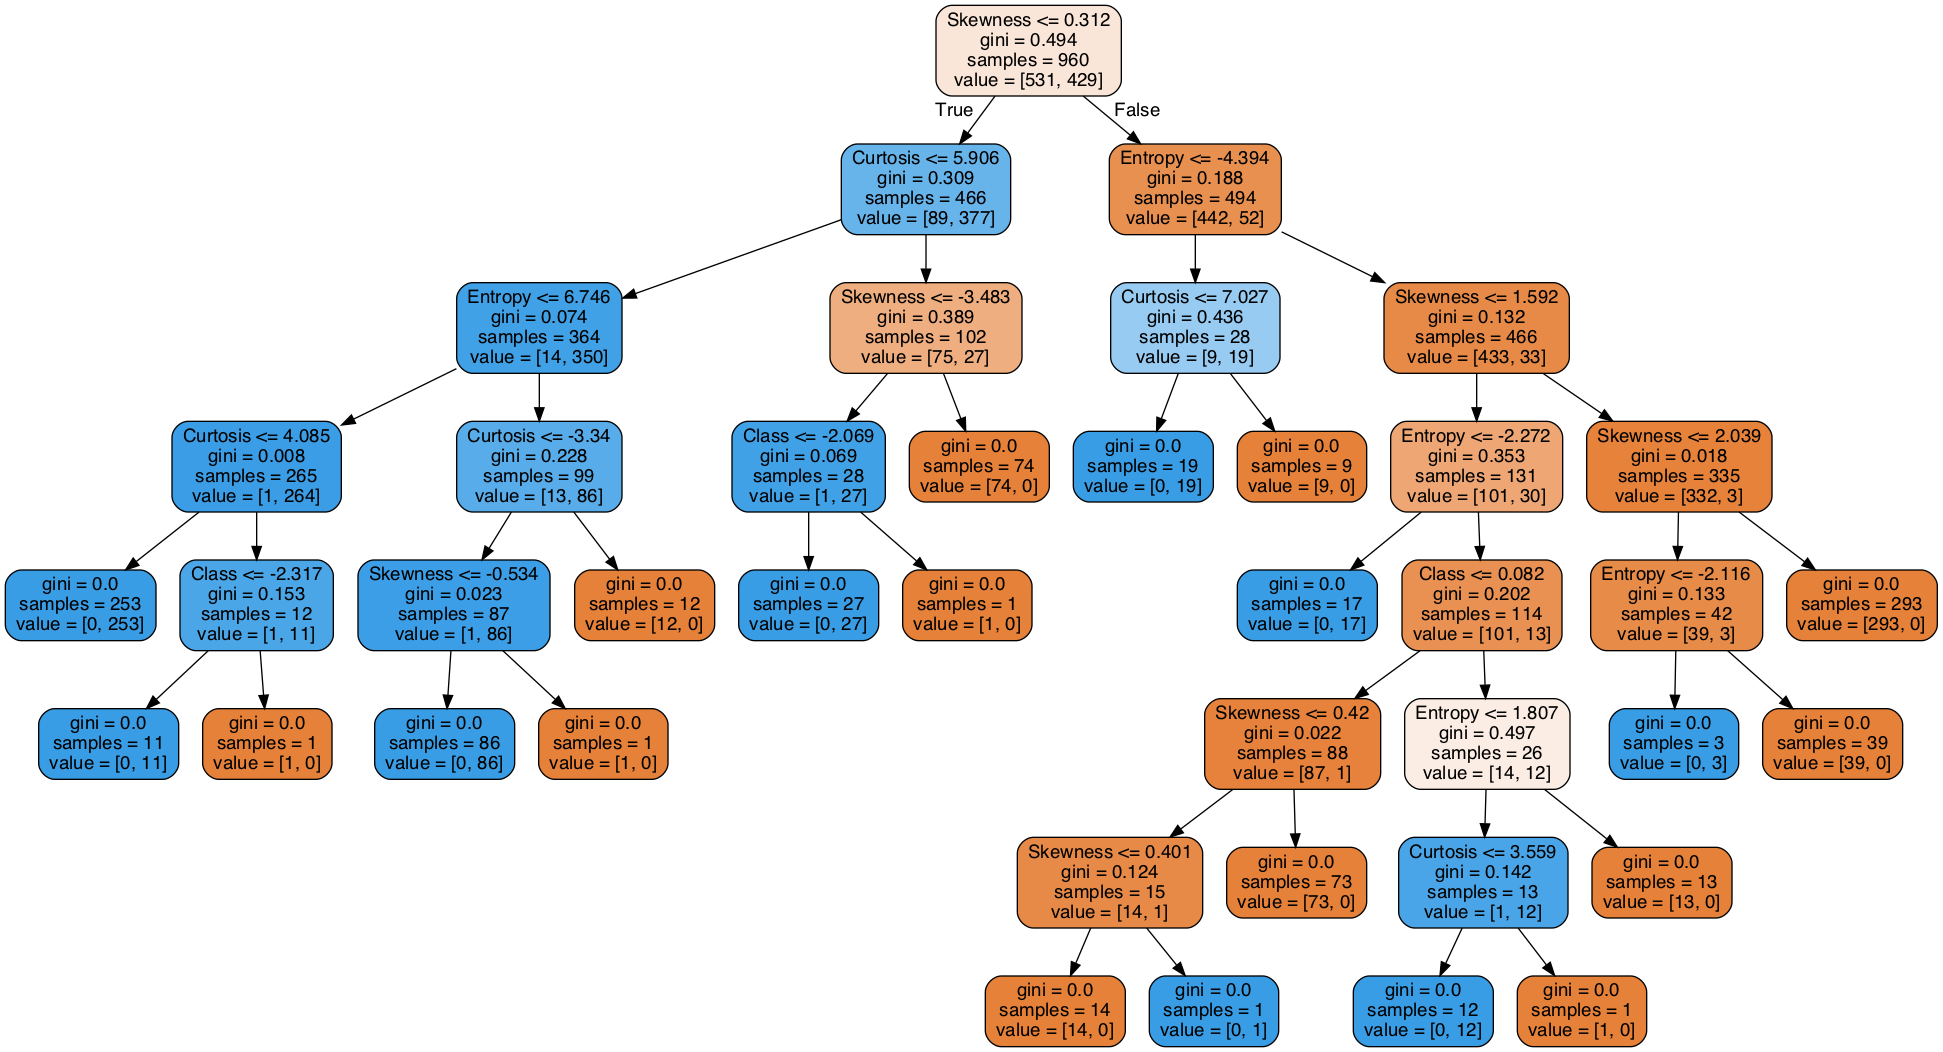

In [37]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
rfc_pred = rfc.predict(X_test)

In [40]:
print(confusion_matrix(y_test,rfc_pred))

[[227   4]
 [  4 177]]


In [41]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       231
          1       0.98      0.98      0.98       181

avg / total       0.98      0.98      0.98       412

